# BCRT / CRT-2 — Camera-Ready Analyses (All-in-One)

In [1]:
# Auto-detect project base
from pathlib import Path

def find_base(start=Path('.').resolve()):
    p = start
    for _ in range(6):
        if (p/'config'/'config.yaml').exists() and (p/'src').exists():
            break
        p = p.parent
    BASE = p
    TABLES = BASE / 'reports' / 'tables'
    FIGS_2PL = BASE / 'reports' / 'figures' / 'irt2pl'
    FIGS_DEC = BASE / 'reports' / 'figures' / 'bcrt_decision'
    print('BASE:', BASE)
    return BASE, TABLES, FIGS_2PL, FIGS_DEC

BASE, TABLES, FIGS_2PL, FIGS_DEC = find_base()


BASE: /Users/sionmarcanthony/Desktop/phd/bcrt_analysis/bcrt-validation-fixed-v6


In [2]:
import pandas as pd, numpy as np
from IPython.display import display, Image

per_item = pd.read_csv(TABLES / 'per_item_stats.csv')
irt_bcrt = pd.read_csv(TABLES / 'irt2pl_bcrt.csv')
irt_crt2 = pd.read_csv(TABLES / 'irt2pl_crt2.csv')
reliab = pd.read_csv(TABLES / 'reliability.csv', dtype={'k':int}, low_memory=False)
person = pd.read_csv(BASE / 'data' / 'processed' / 'person_with_liwc.csv')

bcrt = per_item[per_item['family']=='BCRT'].rename(columns={'item':'item_id'}).merge(irt_bcrt[['item_id','a_hat','b_hat']], on='item_id', how='left').sort_values('item_id')
display(bcrt[['item_id','p_unseen','r_itemrest_bcrt','r_itemrest_comb','r_itemrest_crt2','pct_intuitive_errors','a_hat','b_hat']].round(3))


,item_id,p_unseen,r_itemrest_bcrt,r_itemrest_comb,r_itemrest_crt2,pct_intuitive_errors,a_hat,b_hat
0,bcrt_q1,0.419,0.044,0.135,0.206,0.258,0.747,0.287
1,bcrt_q2,0.656,0.144,0.299,0.385,0.250,0.806,-0.930
2,bcrt_q3,0.315,0.434,0.469,0.379,0.500,0.971,0.394
3,bcrt_q4,0.129,0.247,0.288,0.257,0.333,1.117,1.358
4,bcrt_q5,0.320,0.104,0.187,0.233,0.395,0.680,0.660
5,bcrt_q6,0.440,0.352,0.315,0.201,0.429,0.652,0.109


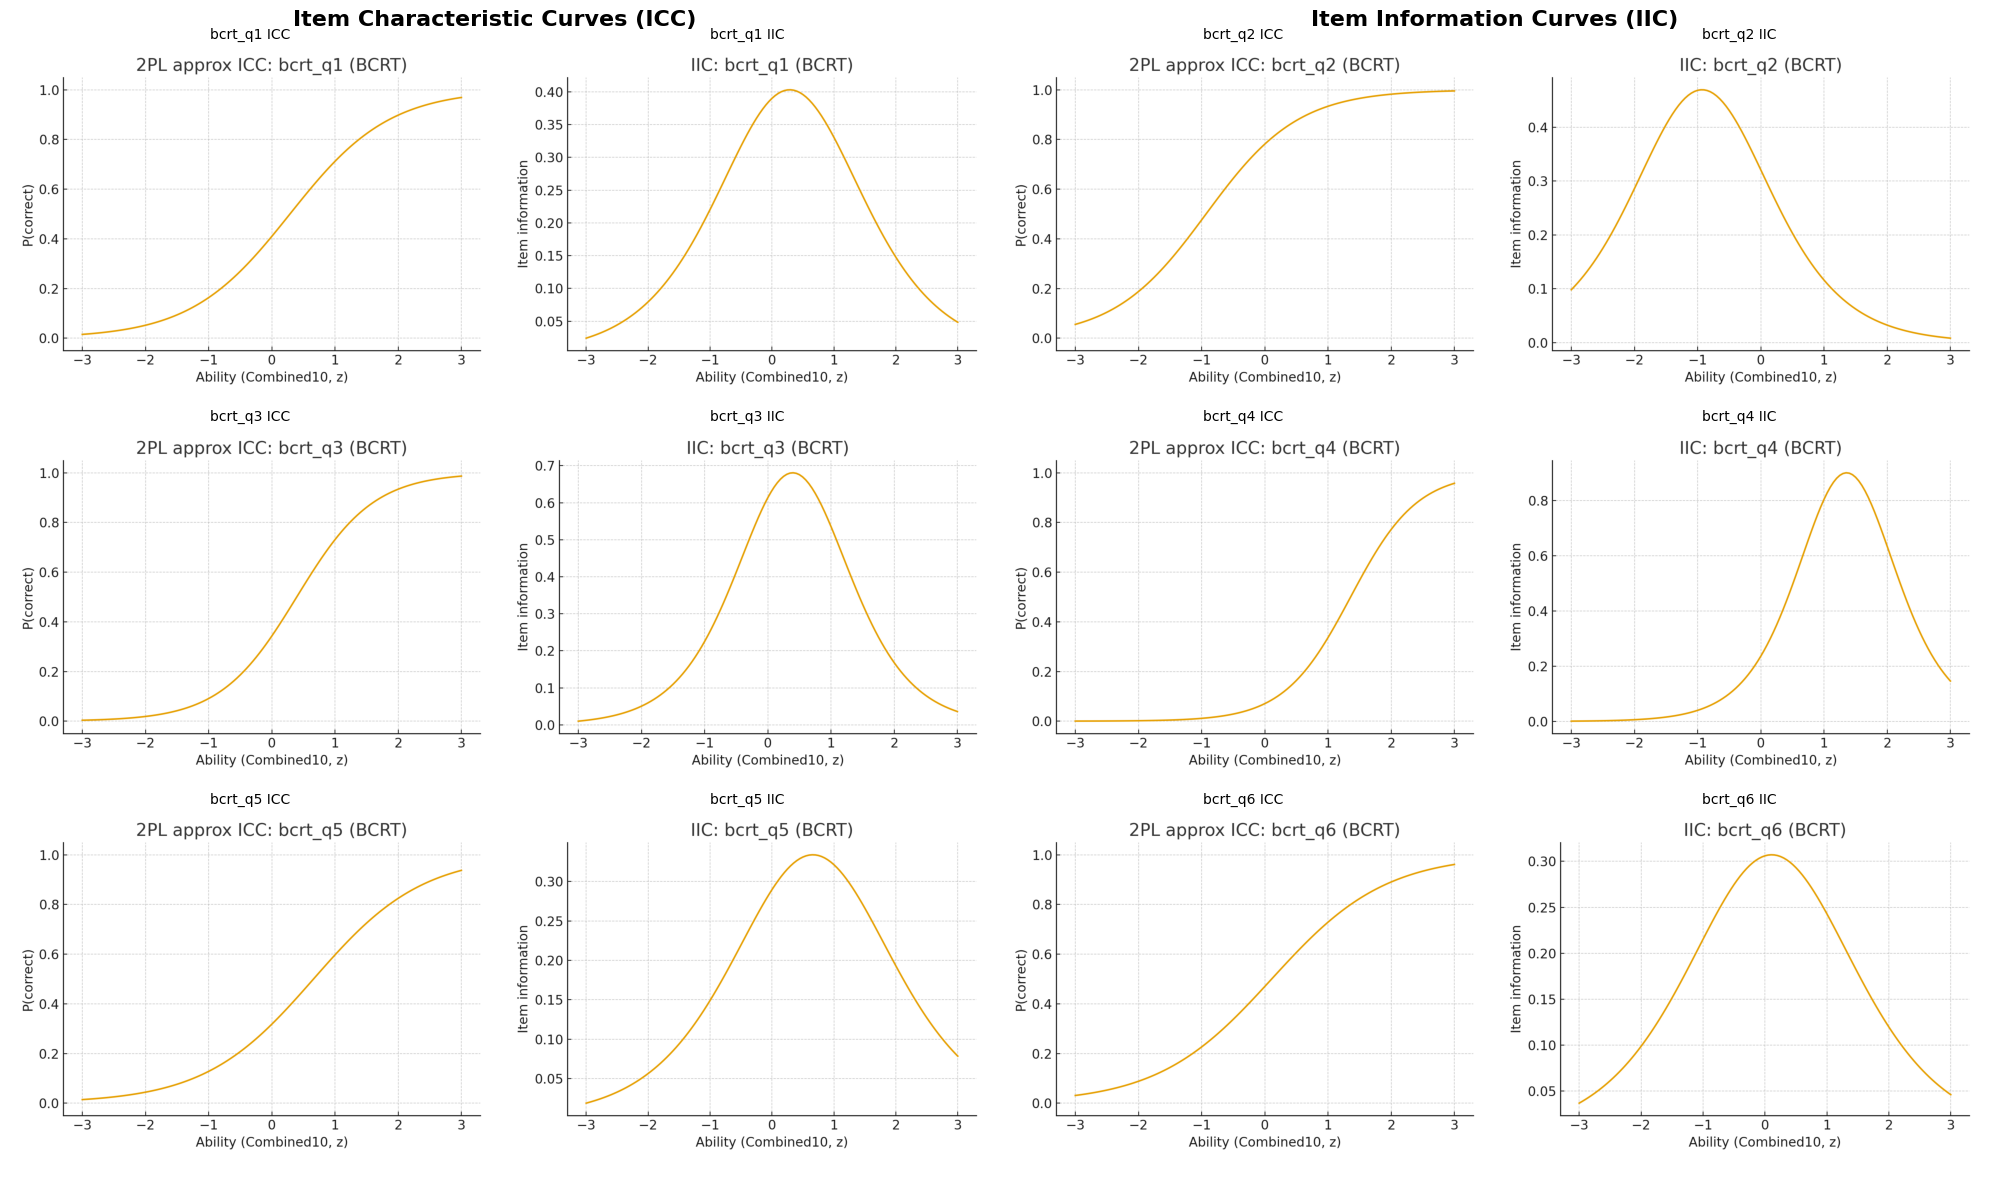

In [3]:
# Show ICC/IIC curves for BCRT
import matplotlib.pyplot as plt
from IPython.display import display

# Create two panels: one for ICC, one for IIC
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

# ICC panel
ax1.set_title('Item Characteristic Curves (ICC)', fontsize=16, fontweight='bold')
ax1.axis('off')

# IIC panel  
ax2.set_title('Item Information Curves (IIC)', fontsize=16, fontweight='bold')
ax2.axis('off')

# Create subplots within each panel (3x2 grid for 6 items)
icc_axes = []
iic_axes = []

for i in range(6):
    row = i // 2
    col = i % 2
    
    # ICC subplot
    icc_ax = fig.add_subplot(3, 4, 2*i + 1)
    icc_axes.append(icc_ax)
    
    # IIC subplot
    iic_ax = fig.add_subplot(3, 4, 2*i + 2)
    iic_axes.append(iic_ax)

# Load and display images
items = sorted(bcrt['item_id'])
for i, item in enumerate(items):
    if i < 6:  # Only show first 6 items
        # ICC
        icc_path = FIGS_2PL / f'icc_{item}_bcrt.png'
        if icc_path.exists():
            img = plt.imread(str(icc_path))
            icc_axes[i].imshow(img)
            icc_axes[i].set_title(f'{item} ICC', fontsize=10)
            icc_axes[i].axis('off')
        
        # IIC
        iic_path = FIGS_2PL / f'iic_{item}_bcrt.png'
        if iic_path.exists():
            img = plt.imread(str(iic_path))
            iic_axes[i].imshow(img)
            iic_axes[i].set_title(f'{item} IIC', fontsize=10)
            iic_axes[i].axis('off')

plt.tight_layout()
plt.show()


## CRT-2 IRT (2PL) and TIF comparisons

### BCRT - Core 3
Q2, Q3, Q6
### BCRT - Core 4
Q2, Q3, Q4, Q6

,item_id,n,p_correct,beta0,beta1,se_beta0,se_beta1,a_hat,b_hat
0,crt2_q1,240,0.704167,1.208977,1.400200,0.186211,0.224253,0.823647,-0.863432
1,crt2_q2,240,0.741667,1.244987,0.925586,0.172750,0.190592,0.544463,-1.345079
2,crt2_q3,240,0.829167,2.101437,1.394624,0.252535,0.262620,0.820367,-1.506812
3,crt2_q4,240,0.170833,-2.479778,1.894094,0.304842,0.284983,1.114173,1.309216


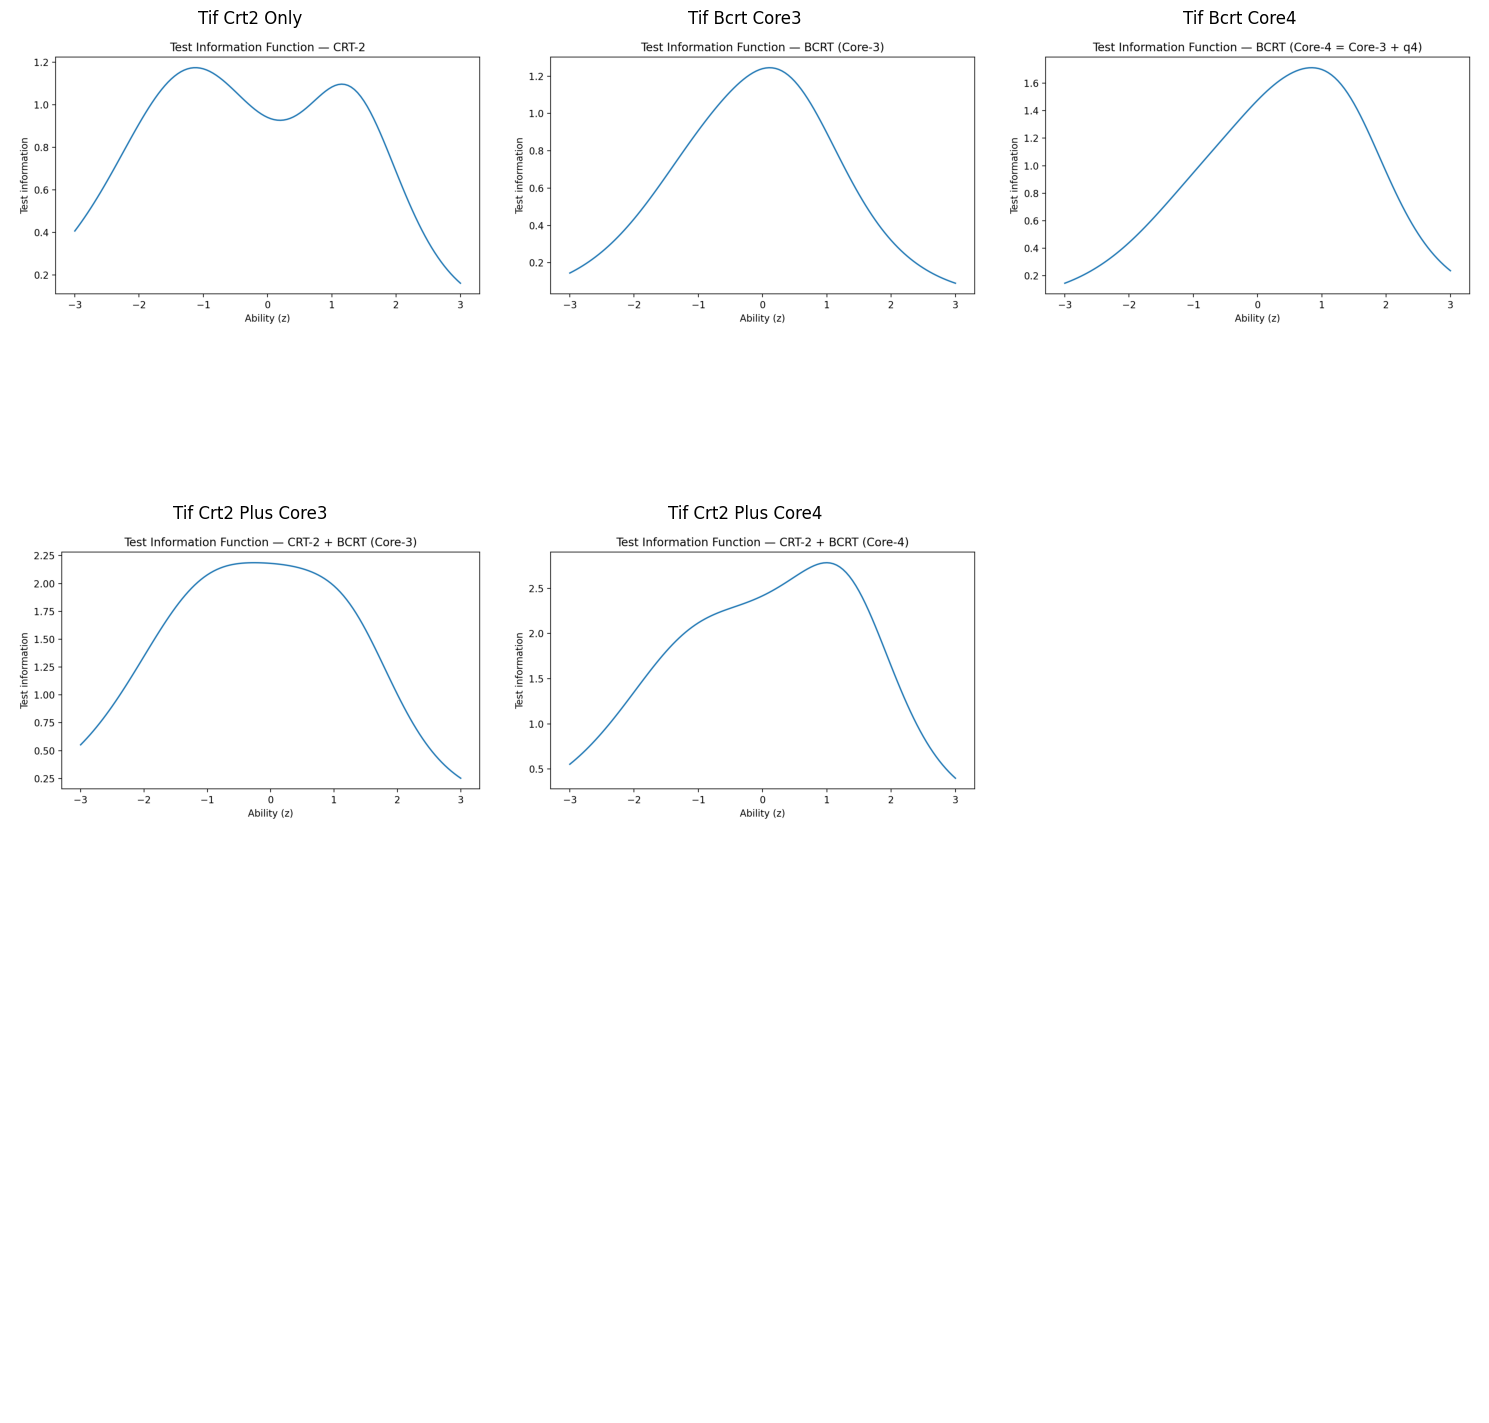

In [4]:
from IPython.display import Image, display
import matplotlib.pyplot as plt

display(irt_crt2)

# Create a 3x3 subplot to show 9 figure panels
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# TIFs
compare_dir = BASE / 'reports' / 'figures' / 'tif_compare'
tif_names = ['tif_crt2_only','tif_bcrt_core3','tif_bcrt_core4','tif_crt2_plus_core3','tif_crt2_plus_core4']

plot_idx = 0
for name in tif_names:
    p = compare_dir / f'{name}.png'
    if p.exists() and plot_idx < 9:
        img = plt.imread(str(p))
        axes[plot_idx].imshow(img)
        axes[plot_idx].set_title(name.replace('_', ' ').title())
        axes[plot_idx].axis('off')
        plot_idx += 1

# # Also show CRT2-only TIF
# p = FIGS_2PL / 'tif_crt2.png'
# if p.exists() and plot_idx < 9:
#     img = plt.imread(str(p))
#     axes[plot_idx].imshow(img)
#     axes[plot_idx].set_title('TIF CRT2')
#     axes[plot_idx].axis('off')
#     plot_idx += 1

# Hide any unused subplots
for i in range(plot_idx, 9):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## Reliability & NFC correlation table

In [5]:
display(reliab)
corr = pd.read_csv(TABLES / 'correlations_totals.csv', index_col=0)
display(corr.round(3))


,sample,label,k,n,KR20,KR20_lo,KR20_hi,Delta_from_base
0,full,CRT-2,4,240,0.415842,0.292257,0.517020,NaN
1,full,BCRT-6,6,240,0.542995,0.433953,0.627781,NaN
2,full,Combined-10,10,240,0.595930,0.506971,0.660188,NaN
3,full,BCRT-4,4,240,0.505073,0.383732,0.591245,NaN
4,full,Combined-8,8,240,0.560573,0.463645,0.632261,NaN
5,full,Combined-10 minus crt2_q1,9,240,0.574363,NaN,NaN,-0.021567
6,full,Combined-10 minus crt2_q2,9,240,0.603621,NaN,NaN,0.007691
7,full,Combined-10 minus crt2_q3,9,240,0.584419,NaN,NaN,-0.011511
8,full,Combined-10 minus crt2_q4,9,240,0.545422,NaN,NaN,-0.050509
9,full,Combined-10 minus bcrt_q1,9,240,0.568056,NaN,NaN,-0.027874


,crt2_total,bcrt6_total,combined10_total,NFC_total
crt2_total,1.000,0.296,0.703,0.128
bcrt6_total,0.296,1.000,0.888,-0.067
combined10_total,0.703,0.888,1.000,0.012
NFC_total,0.128,-0.067,0.012,1.000


## LIWC analyses (Writing tasks)

,outcome,set,predictor,coef,p,r2,n
0,Authentic_Q1,bcrt_core4,bcrt_core4_total,3.732973,0.014673,0.025076,237
1,Authentic_Q1,crt2_plus_core4,crt2_plus_core4,2.079128,0.044421,0.017082,237
2,Clout_Q2,crt2_plus_core3,crt2_plus_core3,-0.791612,0.026560,0.020499,240
3,Clout_Q2,crt2_plus_core4,crt2_plus_core4,-0.706411,0.028523,0.019992,240
4,Clout_Q2,crt2_total,crt2_total,-1.087678,0.047103,0.016460,240


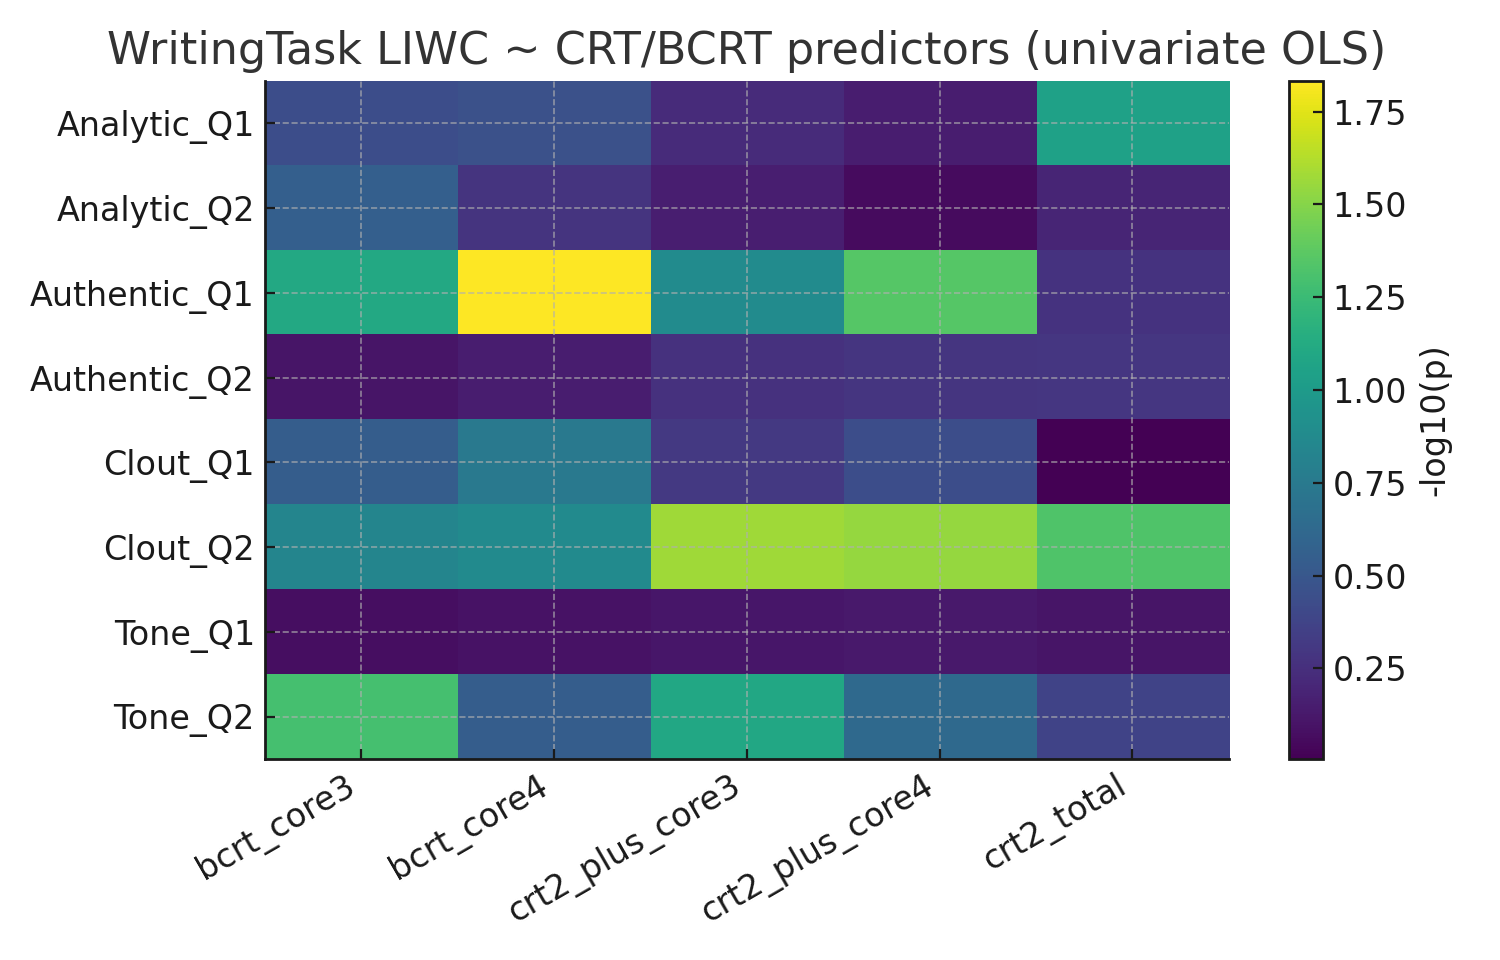

In [6]:
import pandas as pd
from IPython.display import Image, display

sig = pd.read_csv(TABLES / 'liwc_predict_writing_sig_only.csv')
display(sig)

p = BASE / 'reports' / 'figures' / 'liwc_predict_heatmap.png'
if p.exists(): display(Image(filename=str(p)))


# Heatmaps by Family

/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_4427/3339938715.py:16: FutureWarning: The provided callable <function nanmean at 0x108387740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


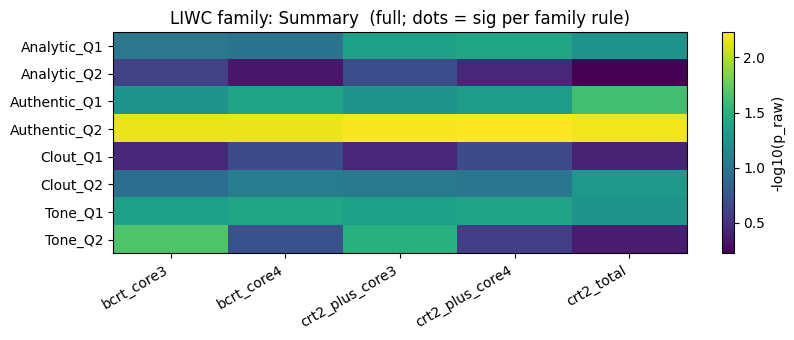

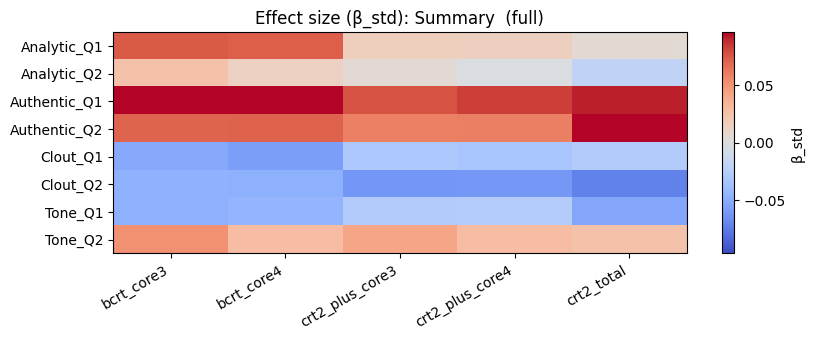

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_4427/3339938715.py:16: FutureWarning: The provided callable <function nanmean at 0x108387740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


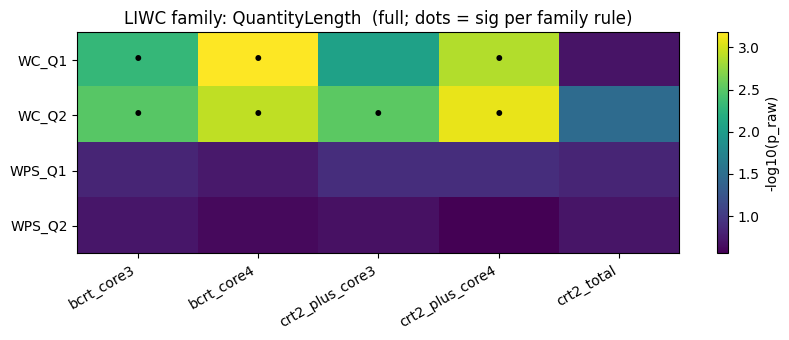

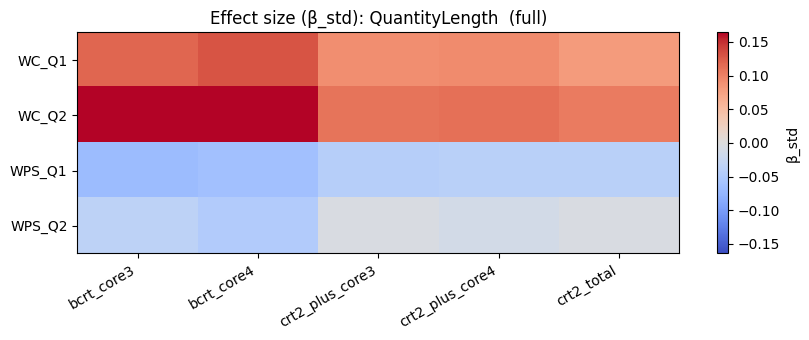

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n
98,QuantityLength,WC_Q1,bcrt_core3,bcrt_core3_total,11.971538,3.604253,20.338823,0.198822,0.005043,0.034580,0.044071,237
100,QuantityLength,WC_Q1,bcrt_core4,bcrt_core4_total,11.927659,5.060072,18.795246,0.234018,0.000664,0.016154,0.057798,237
106,QuantityLength,WC_Q1,crt2_plus_core4,bcrt_core4_total,11.594869,4.506178,18.683560,0.227489,0.001346,0.016154,0.058434,237
110,QuantityLength,WC_Q2,bcrt_core3,bcrt_core3_total,14.519996,4.871604,24.168387,0.208267,0.003182,0.025452,0.068038,240
112,QuantityLength,WC_Q2,bcrt_core4,bcrt_core4_total,14.199375,5.612102,22.786649,0.240605,0.001191,0.016154,0.081146,240
115,QuantityLength,WC_Q2,crt2_plus_core3,bcrt_core3_total,14.459421,4.905095,24.013747,0.207398,0.003015,0.025452,0.068053,240
118,QuantityLength,WC_Q2,crt2_plus_core4,bcrt_core4_total,14.386699,5.961130,22.812269,0.243779,0.000818,0.016154,0.081287,240


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_4427/3339938715.py:16: FutureWarning: The provided callable <function nanmean at 0x108387740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


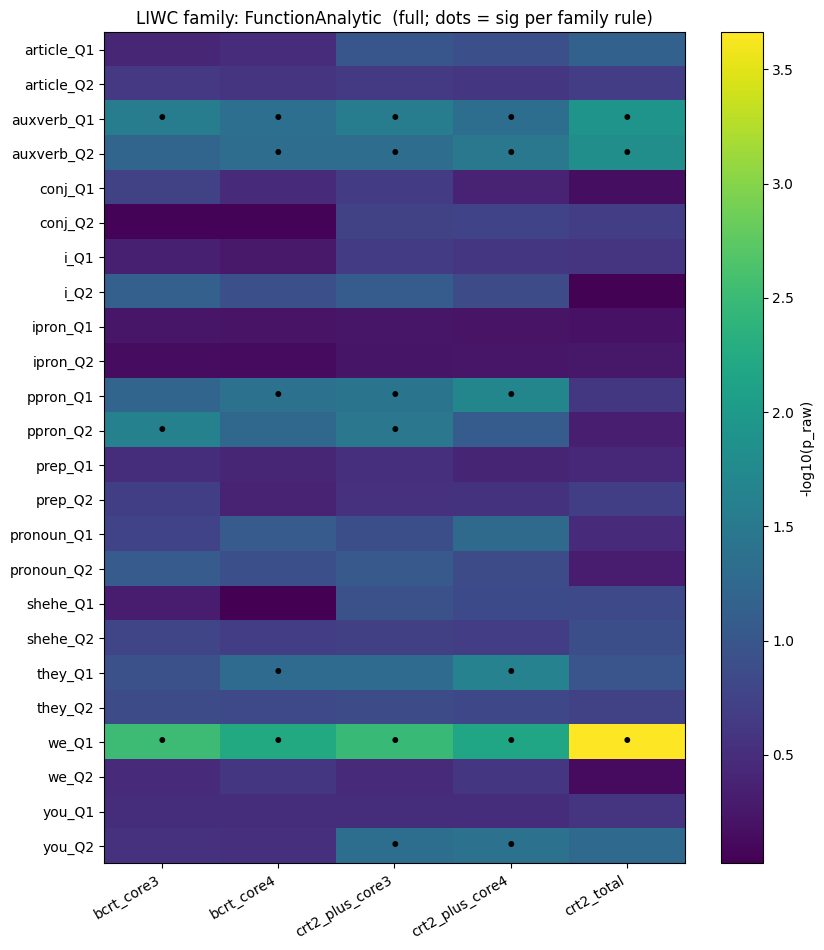

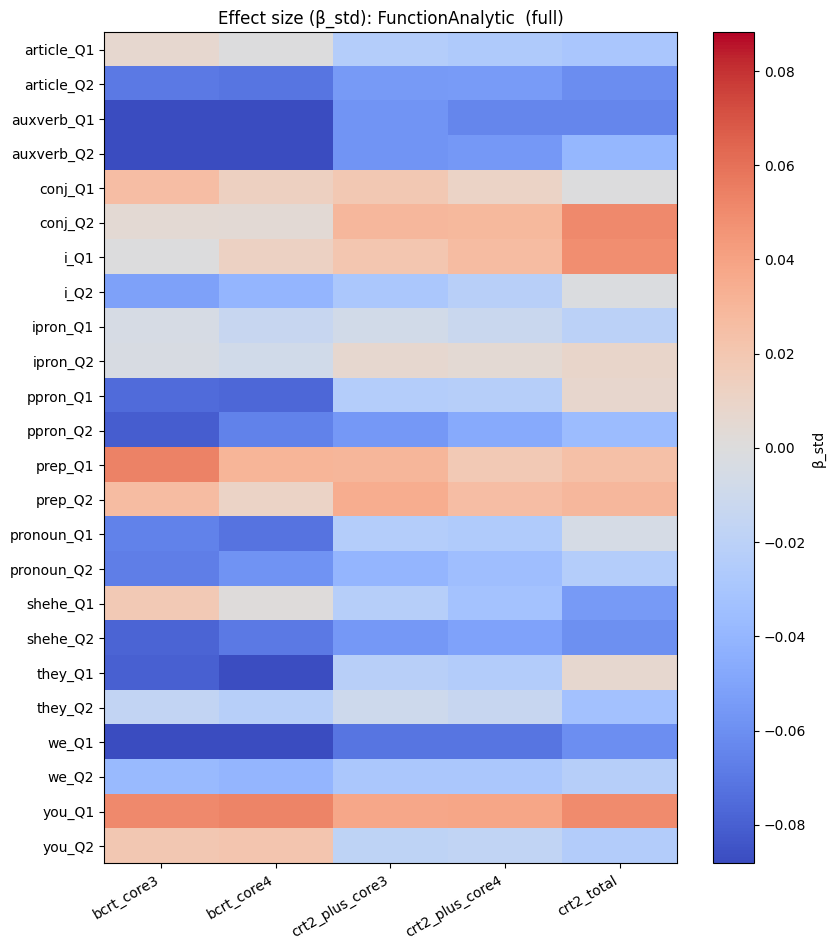

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n
171,FunctionAnalytic,auxverb_Q1,bcrt_core3,seen_count,-0.141158,-0.266415,-0.015901,-0.161630,0.027187,0.027187,0.034455,237
173,FunctionAnalytic,auxverb_Q1,bcrt_core4,seen_count,-0.131410,-0.259091,-0.003729,-0.150467,0.043671,0.043671,0.040136,237
176,FunctionAnalytic,auxverb_Q1,crt2_plus_core3,seen_count,-0.140258,-0.265650,-0.014867,-0.160600,0.028351,0.028351,0.038537,237
179,FunctionAnalytic,auxverb_Q1,crt2_plus_core4,seen_count,-0.129205,-0.256458,-0.001951,-0.147943,0.046585,0.046585,0.045887,237
169,FunctionAnalytic,auxverb_Q1,crt2_total,seen_count,-0.154825,-0.275963,-0.033686,-0.177278,0.012244,0.012244,0.033080,237
184,FunctionAnalytic,auxverb_Q2,bcrt_core4,bcrt_core4_total,-0.373394,-0.742116,-0.004671,-0.146525,0.047163,0.047163,0.036420,240
187,FunctionAnalytic,auxverb_Q2,crt2_plus_core3,bcrt_core3_total,-0.485354,-0.963513,-0.007194,-0.161221,0.046647,0.046647,0.042299,240
190,FunctionAnalytic,auxverb_Q2,crt2_plus_core4,bcrt_core4_total,-0.433268,-0.832826,-0.033710,-0.170020,0.033556,0.033556,0.044113,240
181,FunctionAnalytic,auxverb_Q2,crt2_total,seen_count,-0.110280,-0.199207,-0.021352,-0.128130,0.015073,0.015073,0.018599,240
268,FunctionAnalytic,ppron_Q1,bcrt_core4,bcrt_core4_total,-0.392883,-0.767044,-0.018721,-0.132124,0.039584,0.039584,0.019228,237


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_4427/3339938715.py:16: FutureWarning: The provided callable <function nanmean at 0x108387740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


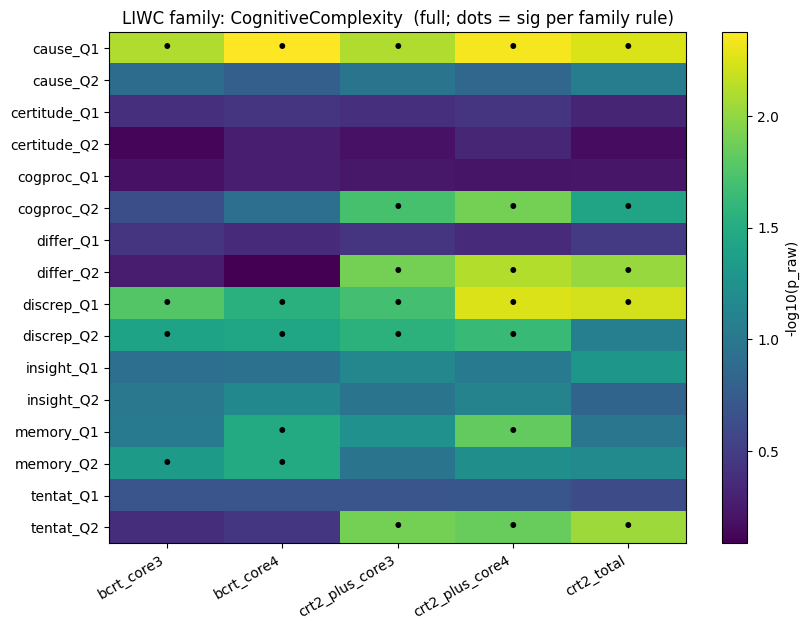

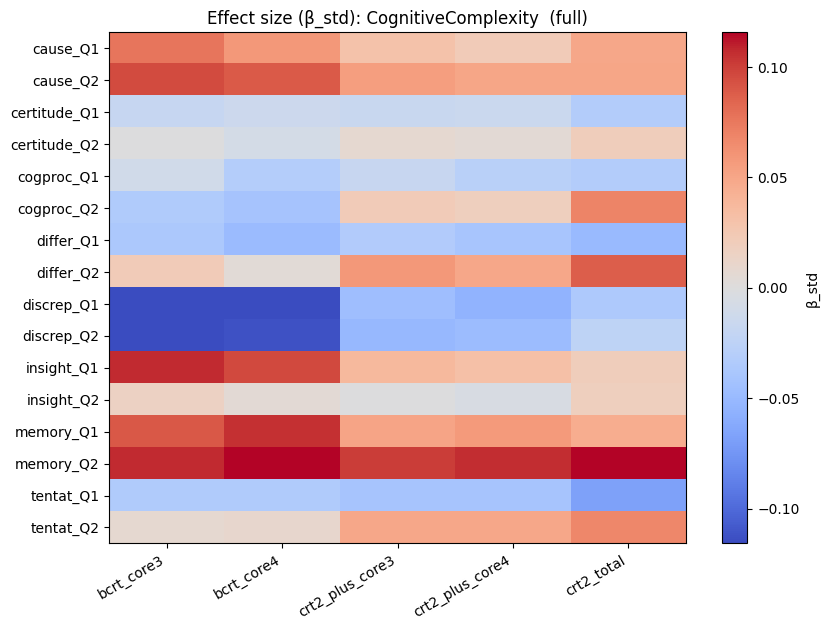

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n
435,CognitiveComplexity,cause_Q1,bcrt_core3,seen_count,0.075772,0.019897,0.131647,0.179825,0.007862,0.007862,0.030626,237
437,CognitiveComplexity,cause_Q1,bcrt_core4,seen_count,0.081403,0.025661,0.137145,0.193189,0.004206,0.004206,0.035489,237
440,CognitiveComplexity,cause_Q1,crt2_plus_core3,seen_count,0.075266,0.019744,0.130789,0.178625,0.007884,0.007884,0.036164,237
443,CognitiveComplexity,cause_Q1,crt2_plus_core4,seen_count,0.080534,0.024995,0.136072,0.191126,0.004482,0.004482,0.039330,237
433,CognitiveComplexity,cause_Q1,crt2_total,seen_count,0.074286,0.021622,0.126950,0.176298,0.005697,0.005697,0.036058,237
498,CognitiveComplexity,cogproc_Q2,crt2_plus_core3,crt2_total,0.765987,0.123328,1.408646,0.165413,0.019484,0.019484,0.033515,240
501,CognitiveComplexity,cogproc_Q2,crt2_plus_core4,crt2_total,0.823358,0.175351,1.471365,0.177803,0.012761,0.012761,0.041190,240
502,CognitiveComplexity,cogproc_Q2,crt2_plus_core4,bcrt_core4_total,-0.635018,-1.235553,-0.034483,-0.156973,0.038215,0.038215,0.041190,240
492,CognitiveComplexity,cogproc_Q2,crt2_total,crt2_total,0.645750,0.037532,1.253969,0.139449,0.037439,0.037439,0.019442,240
522,CognitiveComplexity,differ_Q2,crt2_plus_core3,crt2_total,0.398917,0.084931,0.712904,0.162905,0.012768,0.012768,0.026969,240


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_4427/3339938715.py:16: FutureWarning: The provided callable <function nanmean at 0x108387740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


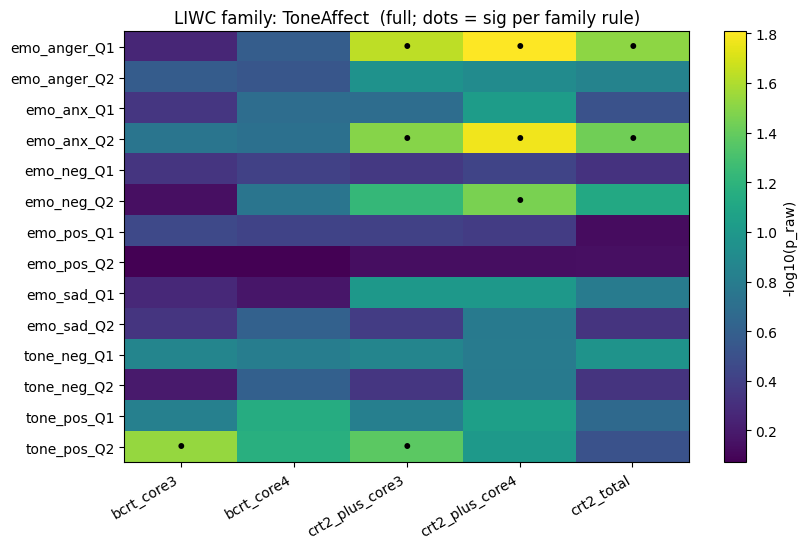

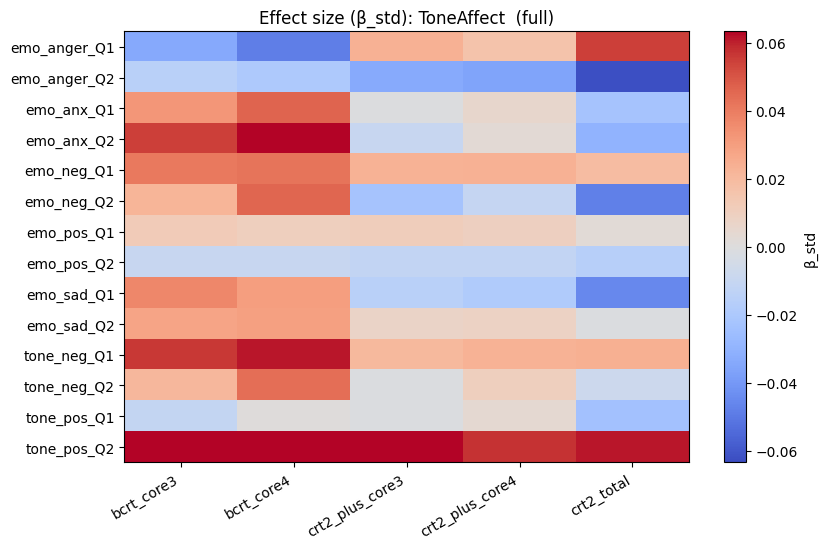

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n
630,ToneAffect,emo_anger_Q1,crt2_plus_core3,crt2_total,0.116408,0.015785,0.217032,0.171621,0.023362,0.023362,0.031062,237
633,ToneAffect,emo_anger_Q1,crt2_plus_core4,crt2_total,0.125881,0.023884,0.227878,0.185587,0.015565,0.015565,0.038872,237
624,ToneAffect,emo_anger_Q1,crt2_total,crt2_total,0.107456,0.010039,0.204872,0.158422,0.030620,0.030620,0.027011,237
666,ToneAffect,emo_anx_Q2,crt2_plus_core3,crt2_total,-0.126613,-0.242443,-0.010784,-0.170857,0.032155,0.032155,0.037467,240
669,ToneAffect,emo_anx_Q2,crt2_plus_core4,crt2_total,-0.142268,-0.259100,-0.025436,-0.191982,0.016999,0.016999,0.050257,240
660,ToneAffect,emo_anx_Q2,crt2_total,crt2_total,-0.118374,-0.229722,-0.007025,-0.159738,0.037191,0.037191,0.034886,240
693,ToneAffect,emo_neg_Q2,crt2_plus_core4,crt2_total,-0.148867,-0.287071,-0.010663,-0.158255,0.034753,0.034753,0.030591,240
694,ToneAffect,emo_neg_Q2,crt2_plus_core4,bcrt_core4_total,0.100586,0.000739,0.200434,0.122401,0.048325,0.048325,0.030591,240
782,ToneAffect,tone_pos_Q2,bcrt_core3,bcrt_core3_total,0.165844,0.016819,0.314870,0.129726,0.029168,0.029168,0.019572,240
787,ToneAffect,tone_pos_Q2,crt2_plus_core3,bcrt_core3_total,0.154908,0.005277,0.304540,0.121171,0.042445,0.042445,0.021032,240


In [7]:
## this was told to be 'after paths cell'.
# Per-family heatmaps (p and beta_std) + companion significance table
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from IPython.display import display
DATASET = "full"   # change to "naive" to view naïve results

df = pd.read_csv(TABLES / f'liwc_predict_families_{DATASET}.csv')

def show_family(fam):
    g = df[df['family']==fam].copy()
    # collapse over predictor term within set by min p
    pv = g.pivot_table(index='outcome', columns='set', values='p_raw', aggfunc='min')
    neglogp = -np.log10(pv.replace(0, np.nextafter(0,1)))
    sig = g.groupby(['outcome','set'])['sig_adj'].max().unstack('set').reindex_like(pv).fillna(False)
    # effect size: average beta_std per (outcome,set)
    bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)

    # Heat 1: -log10(p_raw)
    fig = plt.figure(figsize=(8.5, max(3.5, 0.4*len(neglogp.index))))
    plt.imshow(neglogp.values, aspect='auto')
    plt.xticks(range(neglogp.shape[1]), neglogp.columns, rotation=30, ha='right')
    plt.yticks(range(neglogp.shape[0]), neglogp.index)
    plt.colorbar(label='-log10(p_raw)')
    plt.title(f"LIWC family: {fam}  ({DATASET}; dots = sig per family rule)")
    for i in range(sig.shape[0]):
        for j in range(sig.shape[1]):
            if bool(sig.iloc[i, j]): plt.text(j, i, '•', ha='center', va='center', fontsize=12, fontweight='bold')
    plt.tight_layout(); plt.show()

    # Heat 2: beta_std (signed magnitude)
    fig = plt.figure(figsize=(8.5, max(3.5, 0.4*len(bsv.index))))
    vmax = np.nanpercentile(np.abs(bsv.values), 95)
    plt.imshow(bsv.values, aspect='auto', vmin=-vmax, vmax=vmax, cmap='coolwarm')
    plt.xticks(range(bsv.shape[1]), bsv.columns, rotation=30, ha='right')
    plt.yticks(range(bsv.shape[0]), bsv.index)
    plt.colorbar(label='β_std')
    plt.title(f"Effect size (β_std): {fam}  ({DATASET})")
    plt.tight_layout(); plt.show()

    # Table: significant rows with CI
    sig_rows = g[g['sig_adj']].copy().sort_values(['outcome','set'])
    sig_rows = sig_rows[['family','outcome','set','predictor','beta','ci_lo','ci_hi','beta_std','p_raw','p_adj','r2','n']]
    display(sig_rows.head(50))  # edit as needed

for fam in df['family'].unique():
    show_family(fam)

/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_4427/1724617140.py:12: FutureWarning: The provided callable <function nanmean at 0x108387740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


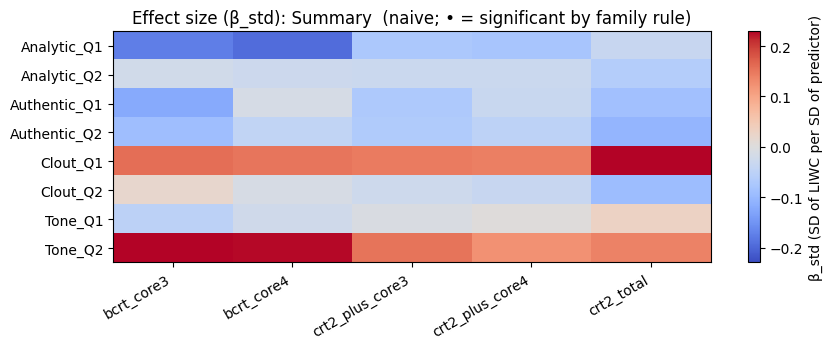

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_4427/1724617140.py:12: FutureWarning: The provided callable <function nanmean at 0x108387740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


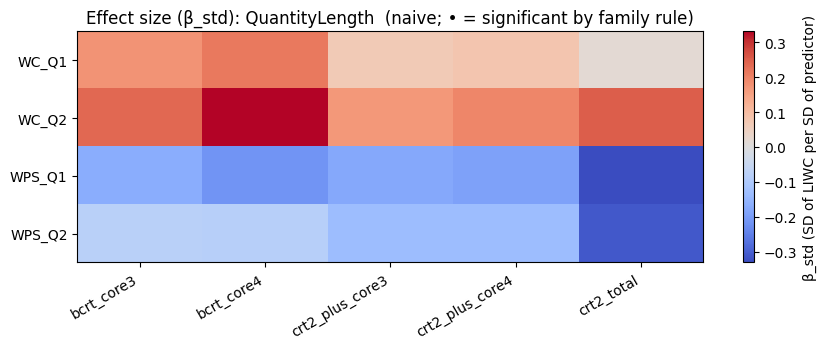

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_4427/1724617140.py:12: FutureWarning: The provided callable <function nanmean at 0x108387740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


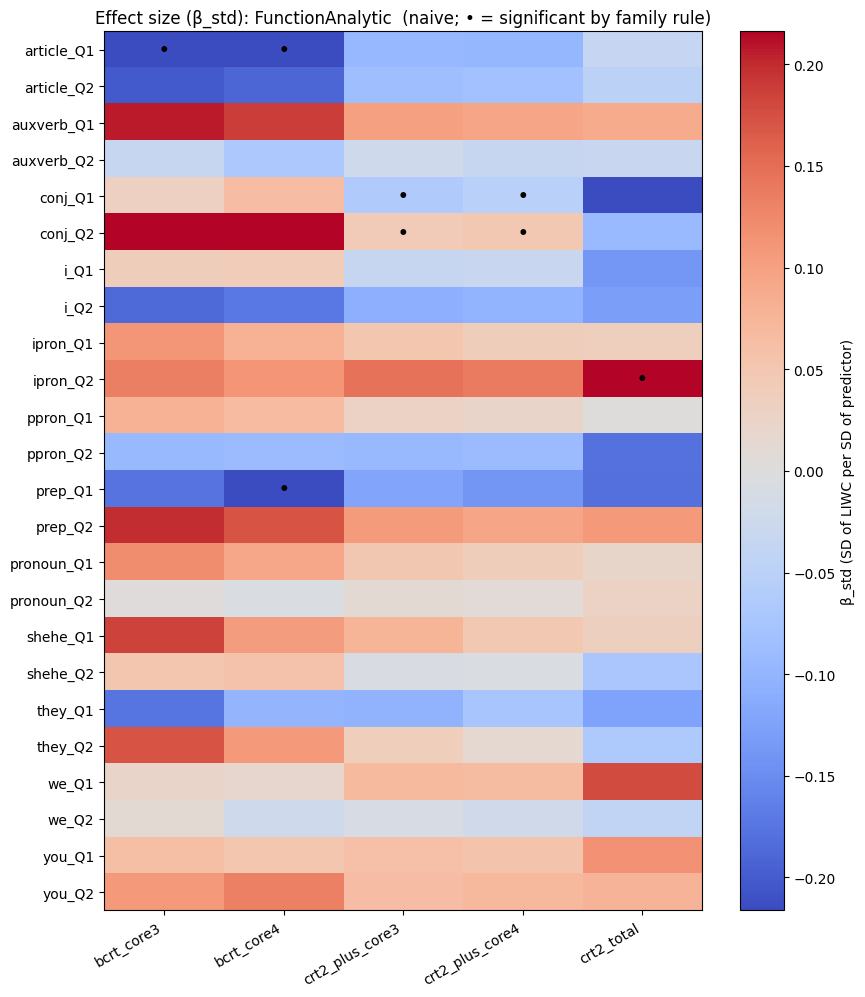

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n
85,FunctionAnalytic,article_Q1,bcrt_core3,bcrt_core3_total,-0.585222,-1.154814,-0.015630,-0.242916,0.044032,0.044032,0.057939,51
86,FunctionAnalytic,article_Q1,bcrt_core4,bcrt_core4_total,-0.535121,-1.070238,-0.000005,-0.251351,0.049994,0.049994,0.062177,51
115,FunctionAnalytic,conj_Q1,crt2_plus_core3,crt2_total,-0.550796,-1.073734,-0.027859,-0.306547,0.038978,0.038978,0.075640,51
117,FunctionAnalytic,conj_Q1,crt2_plus_core4,crt2_total,-0.607396,-1.148945,-0.065848,-0.338049,0.027926,0.027926,0.092226,51
123,FunctionAnalytic,conj_Q2,crt2_plus_core3,bcrt_core3_total,1.112740,0.013567,2.211914,0.328300,0.047235,0.047235,0.093433,52
125,FunctionAnalytic,conj_Q2,crt2_plus_core4,bcrt_core4_total,1.071689,0.085173,2.058206,0.357798,0.033236,0.033236,0.106488,52
147,FunctionAnalytic,ipron_Q2,crt2_total,crt2_total,0.753681,0.082686,1.424676,0.295299,0.027699,0.027699,0.087202,52
170,FunctionAnalytic,prep_Q1,bcrt_core4,bcrt_core4_total,-0.673762,-1.325361,-0.022163,-0.234311,0.042696,0.042696,0.054032,51


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_4427/1724617140.py:12: FutureWarning: The provided callable <function nanmean at 0x108387740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


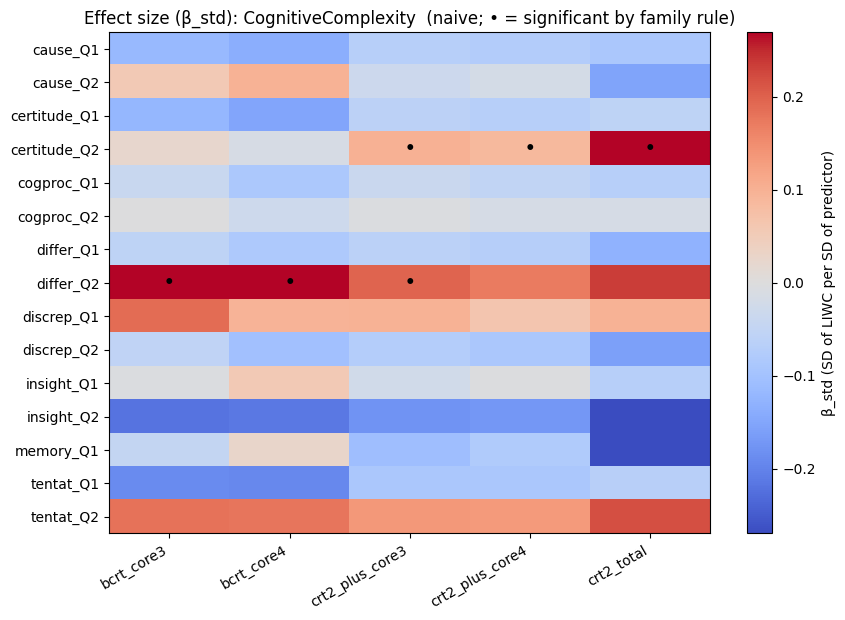

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n
276,CognitiveComplexity,certitude_Q2,crt2_plus_core3,crt2_total,0.283276,0.010546,0.556007,0.331772,0.041771,0.041771,0.087133,52
278,CognitiveComplexity,certitude_Q2,crt2_plus_core4,crt2_total,0.309758,0.031329,0.588187,0.362786,0.029218,0.029218,0.100828,52
273,CognitiveComplexity,certitude_Q2,crt2_total,crt2_total,0.231575,0.040457,0.422693,0.271219,0.017554,0.017554,0.073560,52
302,CognitiveComplexity,differ_Q2,bcrt_core3,bcrt_core3_total,0.913897,0.297904,1.529890,0.341554,0.003639,0.003639,0.116659,52
303,CognitiveComplexity,differ_Q2,bcrt_core4,bcrt_core4_total,0.655303,0.094323,1.216283,0.277139,0.022047,0.022047,0.076806,52
305,CognitiveComplexity,differ_Q2,crt2_plus_core3,bcrt_core3_total,0.791854,0.066329,1.517379,0.295943,0.032421,0.032421,0.124361,52


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_4427/1724617140.py:12: FutureWarning: The provided callable <function nanmean at 0x108387740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


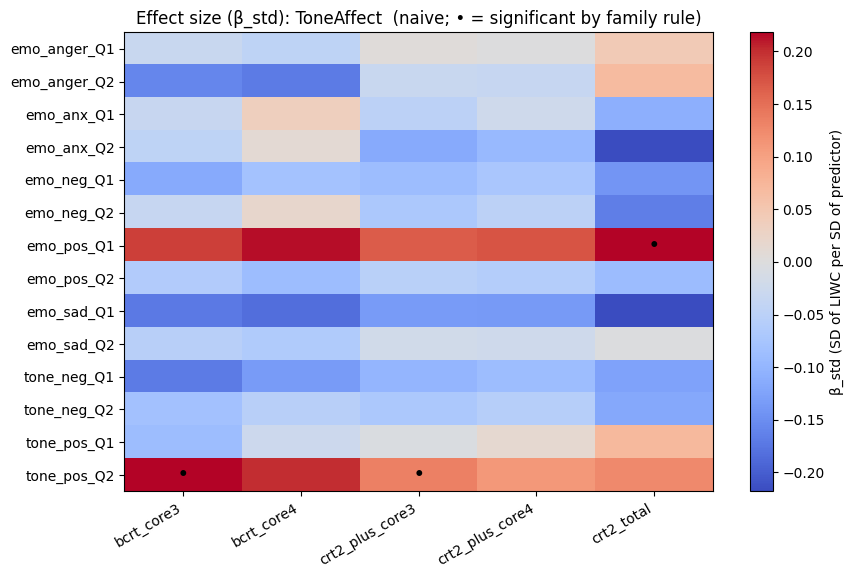

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n
399,ToneAffect,emo_pos_Q1,crt2_total,crt2_total,0.178132,0.027530,0.328734,0.304766,0.020434,0.020434,0.094739,51
449,ToneAffect,tone_pos_Q2,bcrt_core3,bcrt_core3_total,0.310544,0.035469,0.585619,0.268487,0.026916,0.026916,0.072085,52
452,ToneAffect,tone_pos_Q2,crt2_plus_core3,bcrt_core3_total,0.309959,0.041414,0.578504,0.267981,0.023681,0.023681,0.072086,52


In [8]:
# Effect-size heatmaps (β_std) with adj-sig markers + companion table - EFFECT SIZE ONLY ONES
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from IPython.display import display

DATASET = "naive"   # change to "naive" for naïve-only results
df = pd.read_csv(TABLES / f'liwc_predict_families_{DATASET}.csv')

def show_family(fam):
    g = df[df['family']==fam].copy()

    # Effect size matrix (average β_std per (outcome,set))
    bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)

    # Significance mask (adj: FDR for Summary/QuantityLength, raw p<.05 for others)
    sig = g.groupby(['outcome','set'])['sig_adj'].max().unstack('set').reindex_like(bsv).fillna(False)

    # β_std heatmap
    fig = plt.figure(figsize=(8.8, max(3.6, 0.42*len(bsv.index))))
    vmax = np.nanpercentile(np.abs(bsv.values), 95)
    plt.imshow(bsv.values, aspect='auto', vmin=-vmax, vmax=vmax, cmap='coolwarm')
    plt.xticks(range(bsv.shape[1]), bsv.columns, rotation=30, ha='right')
    plt.yticks(range(bsv.shape[0]), bsv.index)
    plt.colorbar(label='β_std (SD of LIWC per SD of predictor)')
    plt.title(f"Effect size (β_std): {fam}  ({DATASET}; • = significant by family rule)")
    for i in range(sig.shape[0]):
        for j in range(sig.shape[1]):
            if bool(sig.iloc[i, j]): plt.text(j, i, '•', ha='center', va='center', fontsize=12, fontweight='bold')
    plt.tight_layout(); plt.show()

    # Companion table: only the significant rows, with CI and raw/adj p
    tab = g[g['sig_adj']].copy().sort_values(['outcome','set','predictor'])
    tab = tab[['family','outcome','set','predictor','beta','ci_lo','ci_hi','beta_std','p_raw','p_adj','r2','n']]
    display(tab.head(100))  # bump if you want more

for fam in df['family'].unique():
    show_family(fam)

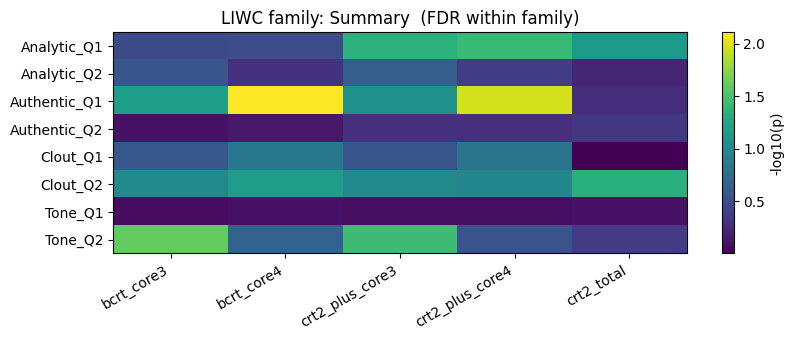

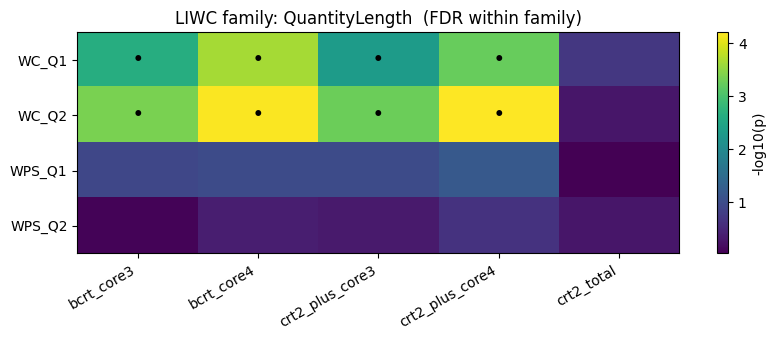

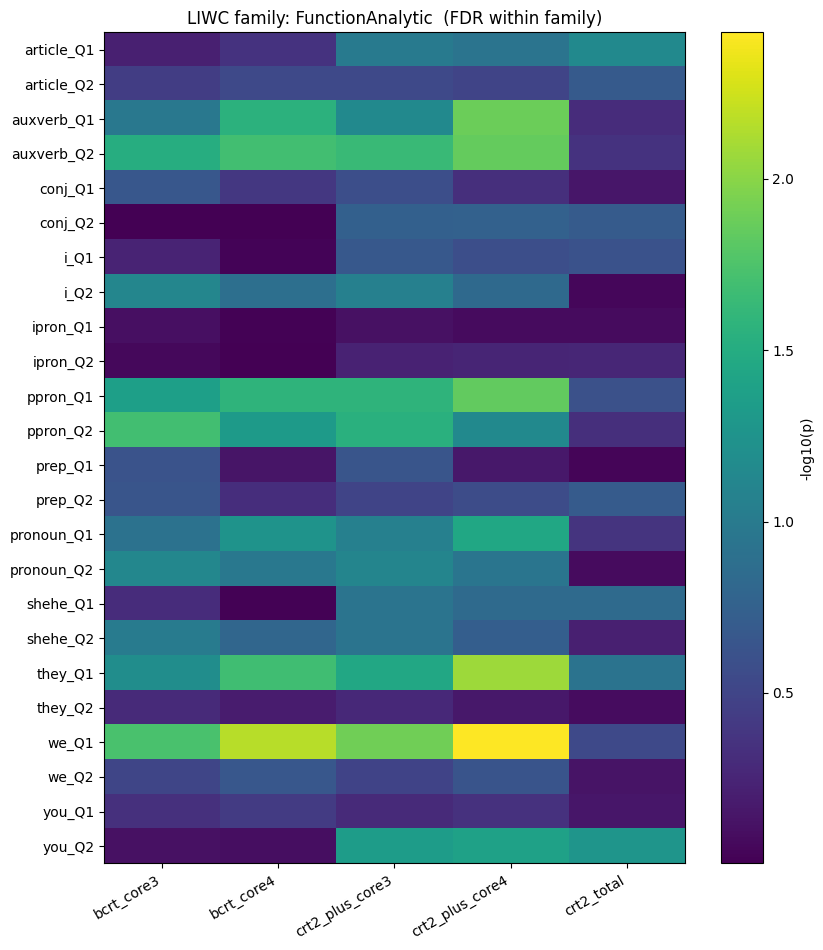

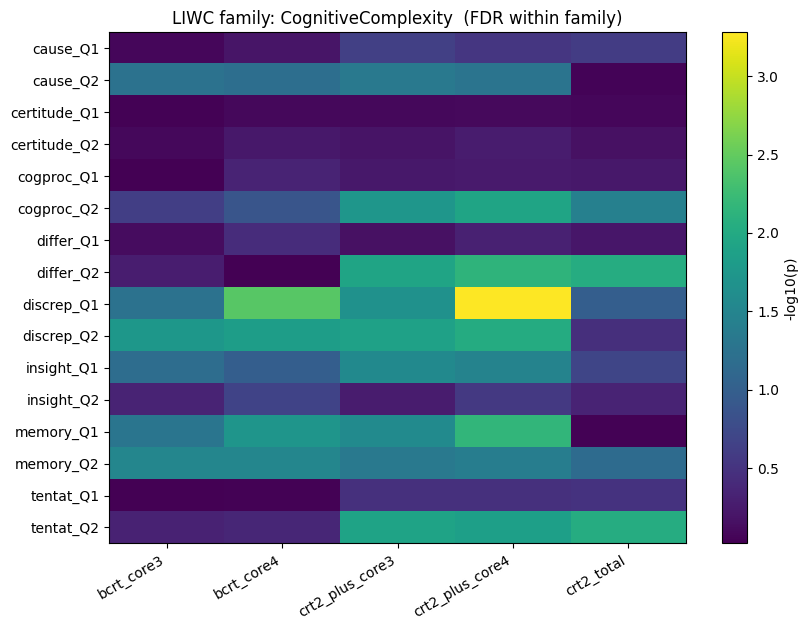

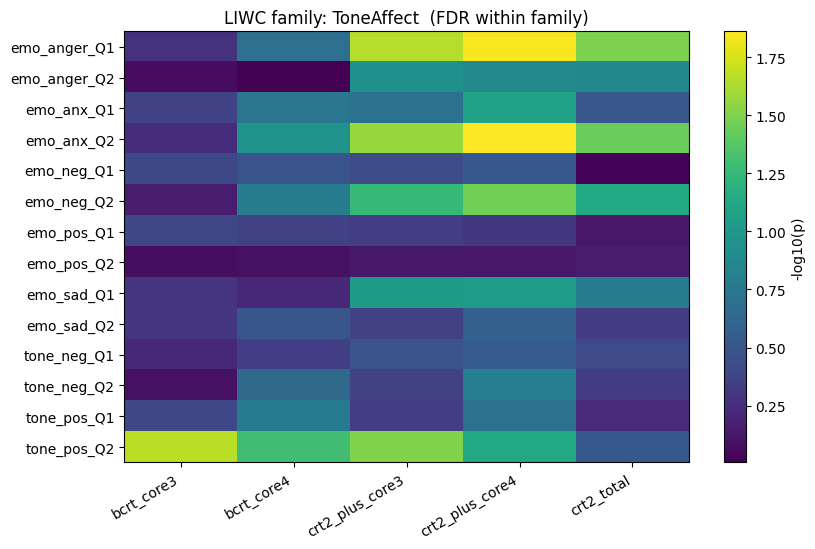

In [9]:
# Heatmaps by family (FDR-marked) May become obsolete?
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

TABLE = TABLES / 'liwc_predict_writing_families_fdr.csv'
df = pd.read_csv(TABLE)

# Build one heatmap per family: rows = outcomes, cols = predictor sets, values = -log10(p), with bold markers for FDR<.05
families = df['family'].unique().tolist()

def heat_for_family(fam):
    g = df[df['family']==fam].copy()
    # min p per (outcome, set) across "predictor" column (handles single- vs two-term models)
    pv = g.pivot_table(index='outcome', columns='set', values='p', aggfunc='min')
    neglogp = -np.log10(pv.replace(0, np.nextafter(0,1)))
    # FDR mask
    sig = g.groupby(['outcome','set'])['sig_fdr'].max().unstack('set').reindex_like(pv).fillna(False)

    fig = plt.figure(figsize=(8.5, max(3.5, 0.4*len(neglogp.index))))
    plt.imshow(neglogp.values, aspect='auto')
    plt.xticks(range(neglogp.shape[1]), neglogp.columns, rotation=30, ha='right')
    plt.yticks(range(neglogp.shape[0]), neglogp.index)
    plt.colorbar(label='-log10(p)')
    plt.title(f"LIWC family: {fam}  (FDR within family)")
    # draw small markers on significant cells
    for i in range(sig.shape[0]):
        for j in range(sig.shape[1]):
            if bool(sig.iloc[i, j]):
                plt.text(j, i, '•', ha='center', va='center', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

for fam in families:
    heat_for_family(fam)

## NFC (corrected scoring) & Extended LIWC regressions

,crt2_total,bcrt6_total,combined10_total,NFC_total
crt2_total,1.000,0.296,0.703,0.128
bcrt6_total,0.296,1.000,0.888,-0.067
combined10_total,0.703,0.888,1.000,0.012
NFC_total,0.128,-0.067,0.012,1.000


,outcome,predictor,set,coef,p,n,r2
0,Authentic_Q1,bcrt_core4_total,bcrt_core4,3.732973,0.014673,237,0.025076
1,Authentic_Q1,crt2_plus_core4,crt2_plus_core4,2.079128,0.044421,237,0.017082
2,Clout_Q2,crt2_plus_core3,crt2_plus_core3,-0.791612,0.026560,240,0.020499
3,Clout_Q2,crt2_plus_core4,crt2_plus_core4,-0.706411,0.028523,240,0.019992
4,Clout_Q2,crt2_total,crt2_total,-1.087678,0.047103,240,0.016460
5,cogproc_Q2,crt2_total,crt2_total,0.645658,0.030827,240,0.019440
6,differ_Q2,crt2_plus_core3,crt2_plus_core3,0.211376,0.040481,240,0.017519
7,differ_Q2,crt2_total,crt2_total,0.401253,0.011008,240,0.026850
8,discrep_Q1,bcrt_core4_total,bcrt_core4,-0.344264,0.006840,237,0.030710
9,discrep_Q2,bcrt_core3_total,bcrt_core3,-0.413379,0.006836,240,0.030333


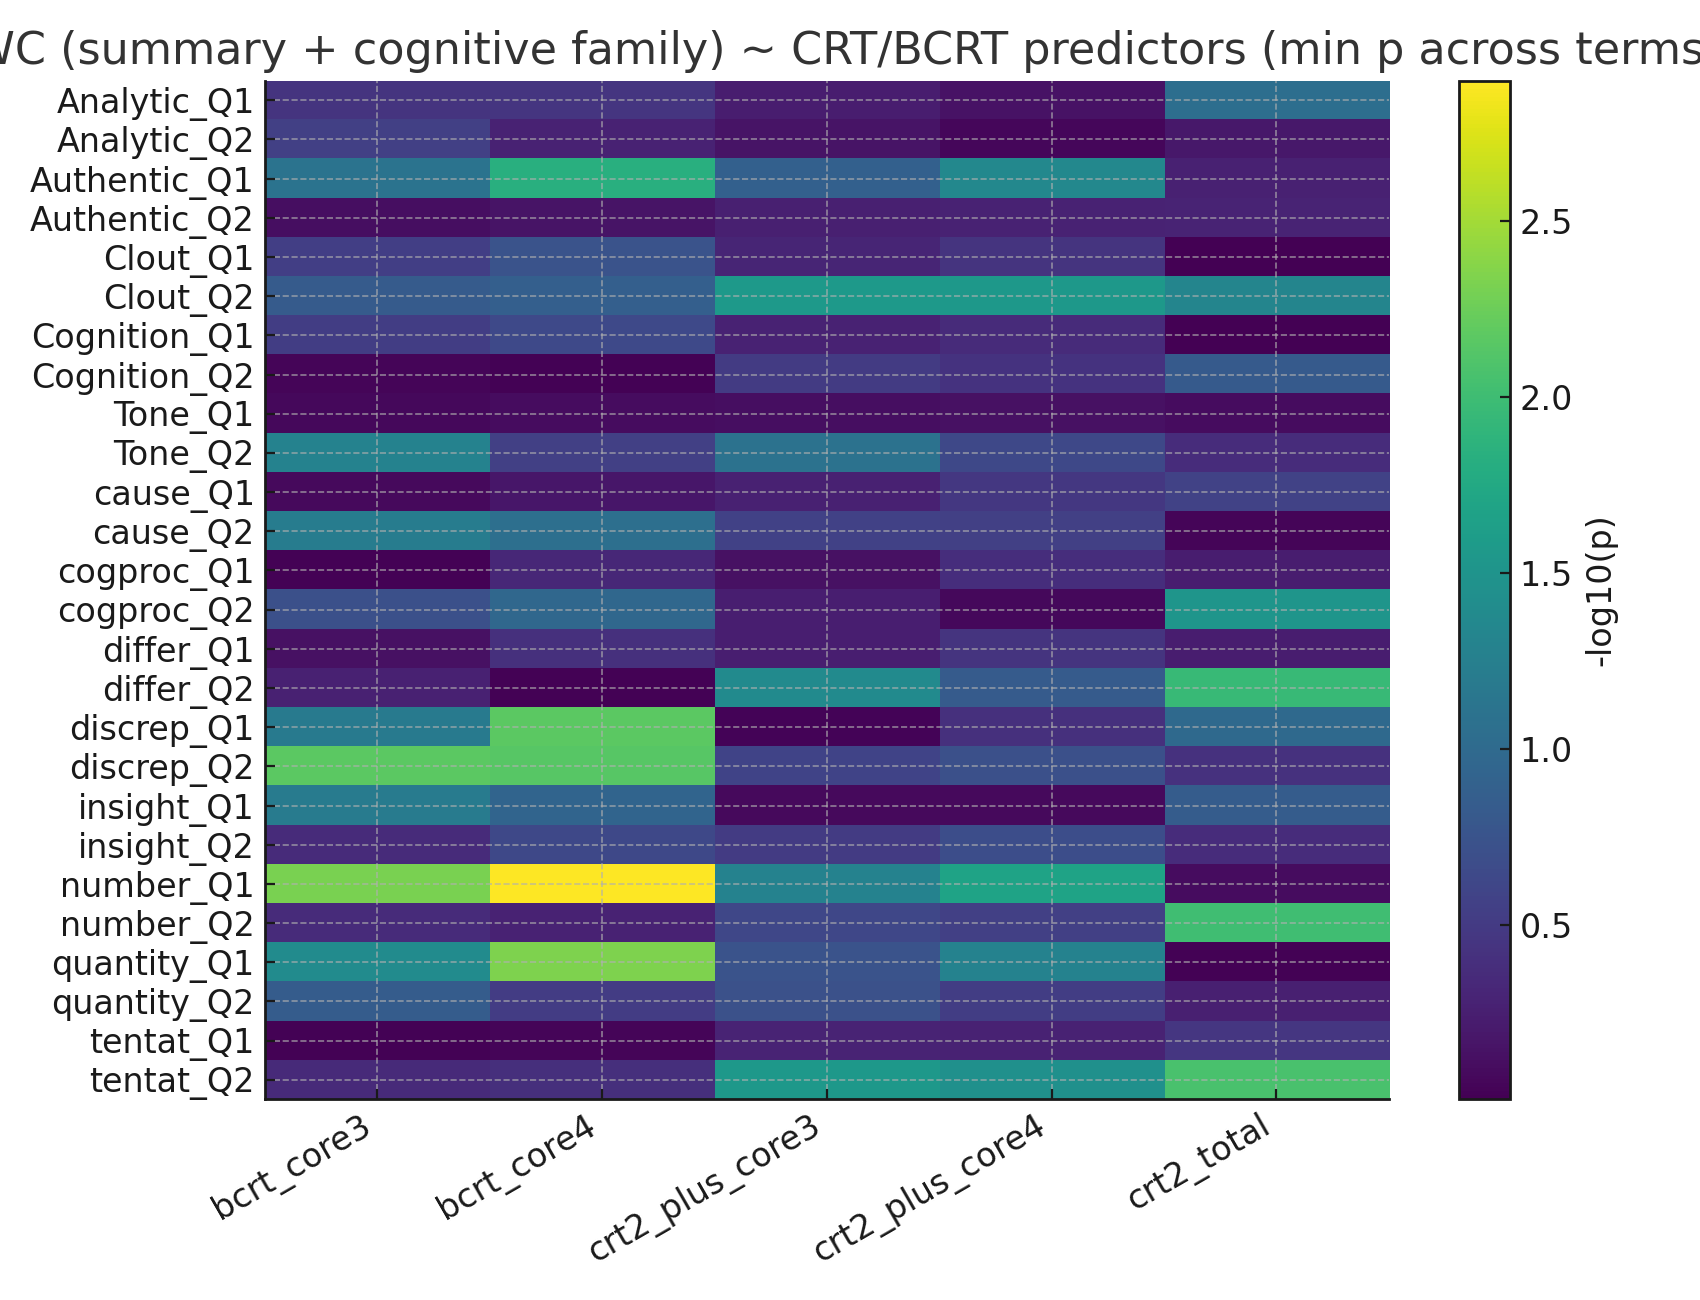

In [10]:
# NFC_total in processed files is now corrected (reverse-scored per key).
# Show the correlations again (corrected NFC):
import pandas as pd
corr = pd.read_csv(TABLES / 'correlations_totals.csv', index_col=0)
display(corr.round(3))

# Extended LIWC regressions (summary + cognitive/analytic family):
ext_all = pd.read_csv(TABLES / 'liwc_predict_writing_extended.csv')
ext_sig = pd.read_csv(TABLES / 'liwc_predict_writing_extended_sig_only.csv')
display(ext_sig.head(30))  # sig-only preview

from IPython.display import Image, display
p = BASE / 'reports' / 'figures' / 'liwc_predict_heatmap_extended.png'
if p.exists(): display(Image(filename=str(p)))


**Note (NFC):** Scoring now uses *reverse* on items **3** and **7** only; all others scored in the forward direction. Correlations in this notebook reflect the corrected NFC.